<a href="https://colab.research.google.com/github/Nathalia1234/Tarefa-2.5---Roteiro-PyTorch/blob/main/Notebook_de_Treinamento_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento do Modelo de Classificação com PyTorch

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Época [1/50], Loss Treino: 1.0086, Acurácia Treino: 0.3167, Loss Validação: 0.9694, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [2/50], Loss Treino: 1.0040, Acurácia Treino: 0.3250, Loss Validação: 0.9646, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [3/50], Loss Treino: 0.9995, Acurácia Treino: 0.3250, Loss Validação: 0.9599, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [4/50], Loss Treino: 0.9950, Acurácia Treino: 0.3250, Loss Validação: 0.9552, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [5/50], Loss Treino: 0.9905, Acurácia Treino: 0.3250, Loss Validação: 0.9505, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [6/50], Loss Treino: 0.9861, Acurácia Treino: 0.3250, Loss Validação: 0.9460, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [7/50], Loss Treino: 0.9817, Acurácia Treino: 0.3333, Loss Validação: 0.9414, Acurácia Validação: 0.3667, F1 Score Validação: 0.2602
Época [8/50], Loss Treino: 

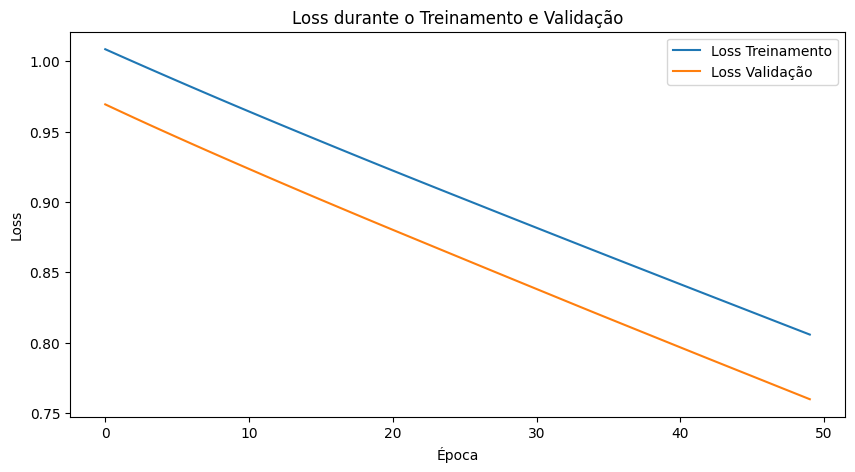

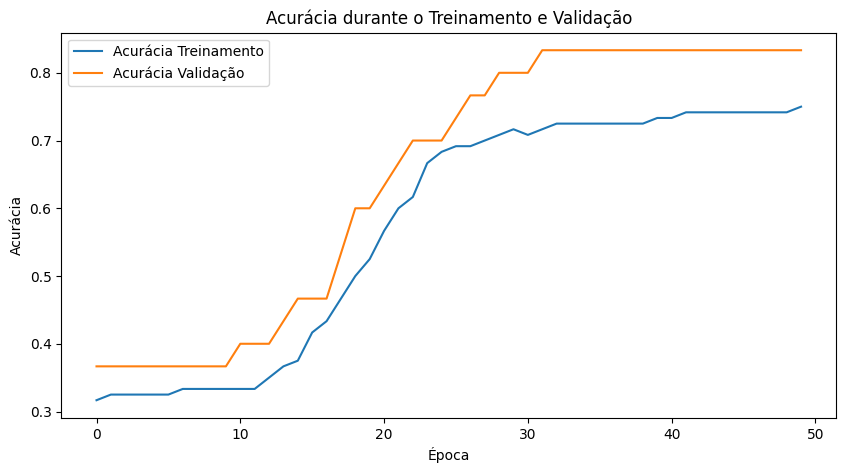

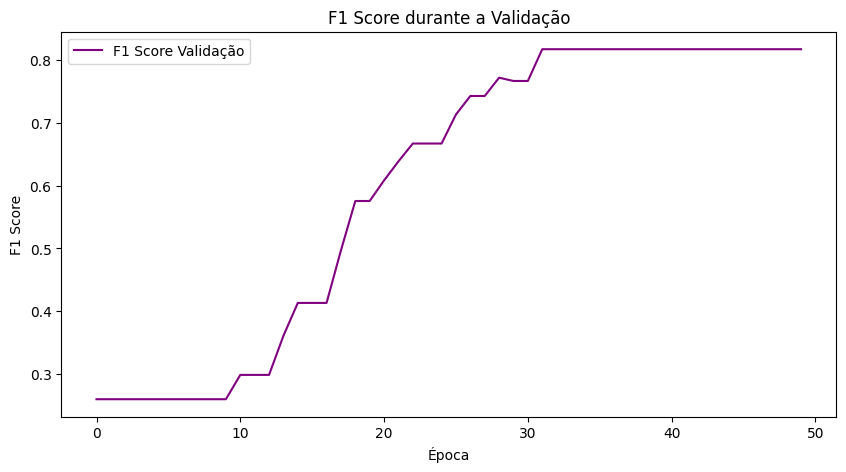

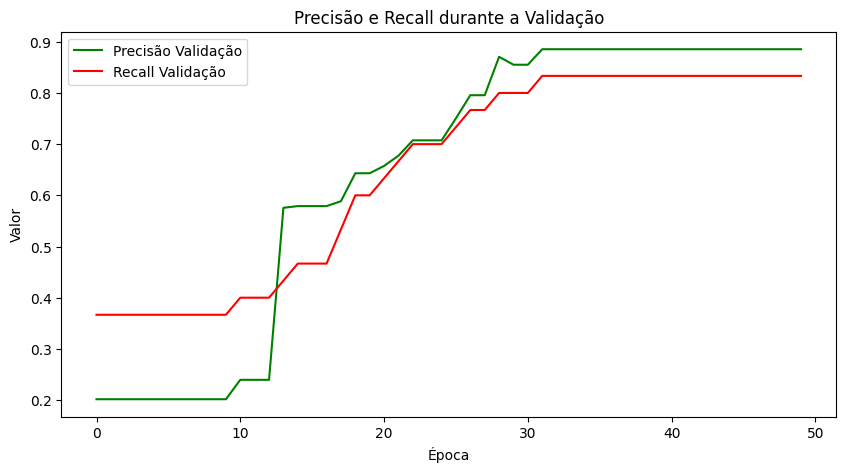

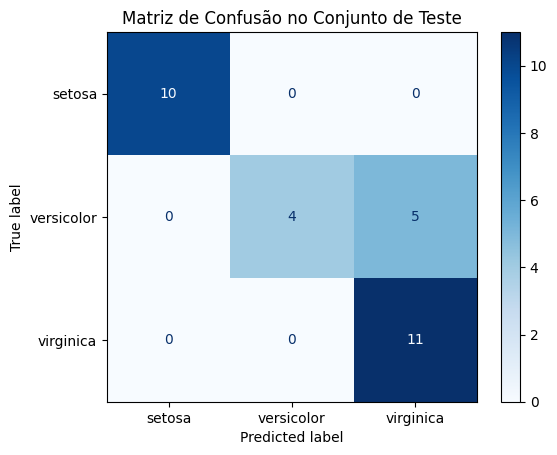

In [68]:
# 1. Importação das Bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# 2. Carregamento e Pré-Processamento dos Dados
# Carregar o dataset Iris
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Separar os dados em features e labels
X = df.drop(columns=['target'])
y = df['target']

# Dividir os dados em conjuntos de treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para tensores PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# 3. Definição do Modelo
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciar o modelo
model = IrisNet()

# 4. Definir Função de Perda e Otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Treinamento do Modelo com Registro de Métricas
epochs = 50
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []

best_val_loss = float('inf')
best_model_wts = None

for epoch in range(epochs):
    # Treinamento
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()

    # Cálculo da acurácia de treino
    _, predicted = torch.max(outputs, 1)
    train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)

    # Validação
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_test).sum().item() / y_test.size(0)

        # Cálculo de outras métricas para o conjunto de validação
        val_f1 = f1_score(y_test, val_predicted, average='weighted')
        val_precision = precision_score(y_test, val_predicted, average='weighted')
        val_recall = recall_score(y_test, val_predicted, average='weighted')

    # Armazenar as métricas
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)

    # Salvar os melhores pesos com base na loss de validação
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = model.state_dict().copy()

    # Exibir métricas a cada época
    print(f"Época [{epoch+1}/{epochs}], Loss Treino: {train_loss.item():.4f}, Acurácia Treino: {train_accuracy:.4f}, Loss Validação: {val_loss.item():.4f}, Acurácia Validação: {val_accuracy:.4f}, F1 Score Validação: {val_f1:.4f}")

# Salvar os melhores pesos
torch.save(best_model_wts, 'best_model.pth')

# 6. Exibir Gráficos de Loss, Acurácia, F1 Score, Precisão e Recall

# Loss durante o Treinamento e Validação
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Loss Treinamento")
plt.plot(val_losses, label="Loss Validação")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss durante o Treinamento e Validação")
plt.legend()
plt.show()

# Acurácia durante o Treinamento e Validação
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Acurácia Treinamento")
plt.plot(val_accuracies, label="Acurácia Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Acurácia durante o Treinamento e Validação")
plt.legend()
plt.show()

# F1 Score durante a Validação
plt.figure(figsize=(10, 5))
plt.plot(val_f1_scores, label="F1 Score Validação", color='purple')
plt.xlabel("Época")
plt.ylabel("F1 Score")
plt.title("F1 Score durante a Validação")
plt.legend()
plt.show()

# Precisão e Recall durante a Validação
plt.figure(figsize=(10, 5))
plt.plot(val_precisions, label="Precisão Validação", color='green')
plt.plot(val_recalls, label="Recall Validação", color='red')
plt.xlabel("Época")
plt.ylabel("Valor")
plt.title("Precisão e Recall durante a Validação")
plt.legend()
plt.show()

# 7. Matriz de Confusão
model.eval()
with torch.no_grad():
    y_pred = model(X_test).argmax(dim=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.show()